## Problem statement
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing the Data


### Importing all the required libraries for different different operation

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
from glob import glob

In [3]:
## To mount the data from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This assignment having a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

####  Read the image data

In [4]:
# We need to define the for train and test images
data_dir_train = pathlib.Path("/content/drive/MyDrive/Melanoma_Detection/Train")
data_dir_test = pathlib.Path('/content/drive/MyDrive/Melanoma_Detection/Test')

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing



### Creating a dataset



In [6]:
batch_size = 32
img_height = 180
img_width = 180

Using 80% of the images for training, and 20% for validation.

In [7]:
## We have to wirte the train data
## using seed = 123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Make sure you resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## We need to write validation dataset
## Using seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Make sure you resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
# Listing out all the classes of skin cancer and store them in a list. 
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualizing the data
####  Create a code to visualize one instance of all the nine classes present in the dataset

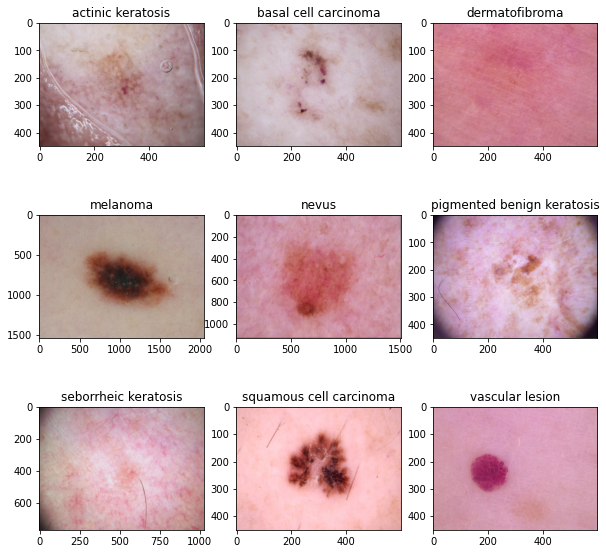

In [10]:
import matplotlib.pyplot as plt
### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10,10))
for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Creating the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

###  Model 1 : CNN Model

In [12]:

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

### Compiling the model
We have to Choose an appropirate optimiser and loss function for model training 

In [13]:
### Choosing an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
# View the summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

### Training the model

In [15]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 183s 675ms/step - loss: 2.0647 - accuracy: 0.1747 - val_loss: 2.0329 - val_accuracy: 0.1499
Epoch 2/20
56/56 [==============================] - 4s 76ms/step - loss: 2.0279 - accuracy: 0.1987 - val_loss: 2.0192 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - 4s 76ms/step - loss: 2.0240 - accuracy: 0.1936 - val_loss: 2.0284 - val_accuracy: 0.2103
Epoch 4/20
56/56 [==============================] - 4s 76ms/step - loss: 1.9947 - accuracy: 0.2238 - val_loss: 1.9567 - val_accuracy: 0.2595
Epoch 5/20
56/56 [==============================] - 4s 76ms/step - loss: 2.0698 - accuracy: 0.2254 - val_loss: 2.0013 - val_accuracy: 0.2282
Epoch 6/20
56/56 [==============================] - 4s 76ms/step - loss: 1.9765 - accuracy: 0.2316 - val_loss: 1.9742 - val_accuracy: 0.2349
Epoch 7/20
56/56 [==============================] - 4s 76ms/step - loss: 1.9732 - accuracy: 0.2254 - val_loss: 1.9947 - val_accuracy: 0.2394
Epoch 8/20
56/56 [===

### Visualize the training results

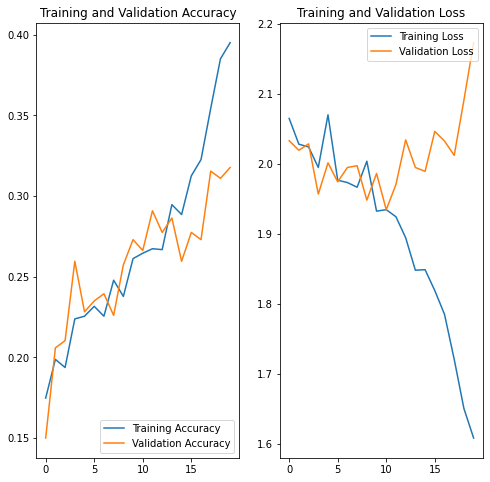

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### To do: Write your findings after the model fit, to see if there is an evidence of model overfit or underfit

**Finding on the first base model**

1. The model is overfitting because we can also see difference in loss 
functions in training & test around the 10-11th epoch

2. The accuracy is just around 75-80% because there are enough features to remember the pattern.


In [17]:
# Todo:- fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

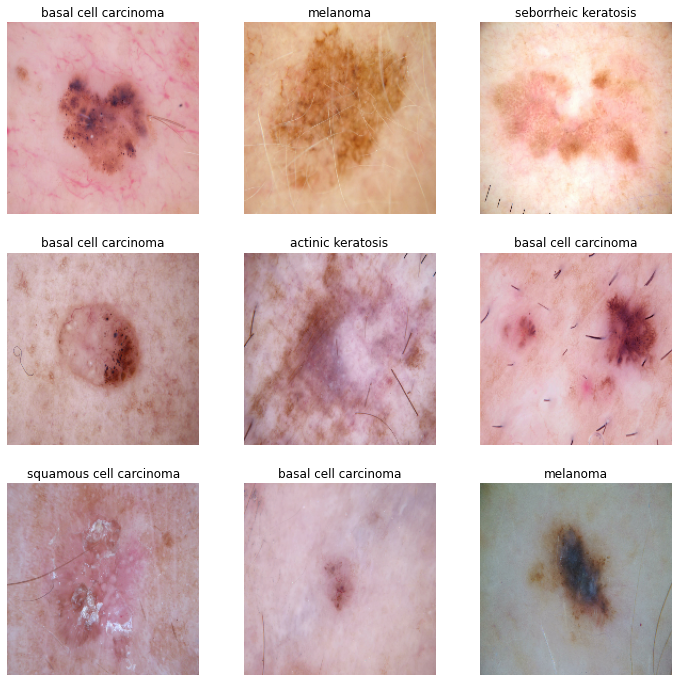

In [18]:
# Todo:- visualizing how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


### Creating the model , compiling and training the model


### Model 2 : CNN Model Using Data Augementation

In [19]:
## Dropout layer can be used if there is an evidence of overfitting in your findings

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ data_augument,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))


### Compile the model

In [20]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [21]:
## training model for 20 epochs
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 7s 92ms/step - loss: 2.0762 - accuracy: 0.2054 - val_loss: 2.0277 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 5s 87ms/step - loss: 2.0175 - accuracy: 0.2271 - val_loss: 2.0276 - val_accuracy: 0.2192
Epoch 3/20
56/56 [==============================] - 5s 86ms/step - loss: 2.0552 - accuracy: 0.2104 - val_loss: 2.0326 - val_accuracy: 0.1588
Epoch 4/20
56/56 [==============================] - 5s 86ms/step - loss: 2.0247 - accuracy: 0.1936 - val_loss: 2.0425 - val_accuracy: 0.1499
Epoch 5/20
56/56 [==============================] - 5s 86ms/step - loss: 2.0051 - accuracy: 0.2026 - val_loss: 1.9495 - val_accuracy: 0.2685
Epoch 6/20
56/56 [==============================] - 5s 86ms/step - loss: 1.9223 - accuracy: 0.2762 - val_loss: 1.9047 - val_accuracy: 0.2640
Epoch 7/20
56/56 [==============================] - 5s 86ms/step - loss: 1.8831 - accuracy: 0.2757 - val_loss: 1.8009 - val_accuracy: 0.3244
Epoch 8/20
56

### Visualizing the results

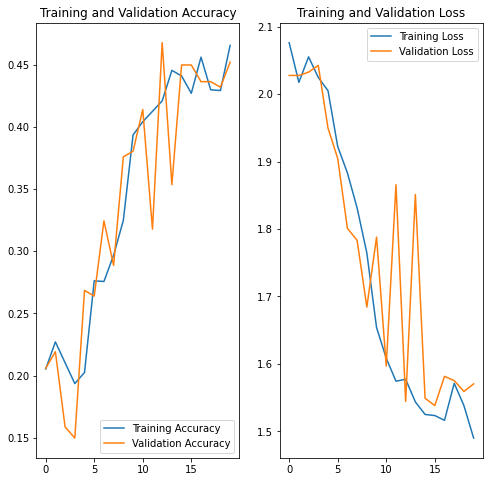

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### To do- : Write al findings after the model fit, to check if there is an evidence of model overfit or underfit.
**Finding from Second Model**

1. overfitting problem has solved due to data augmentation

2. We can increase the epochs to increase the accuracy.

#### **To do:**-  Find the distribution of classes in the training dataset.


In [23]:

path_list=[]
lesion_list=[]
for i in class_names:
      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/drive/MyDrive/Melanoma_Detection/Trai...,actinic keratosis
1,/content/drive/MyDrive/Melanoma_Detection/Trai...,actinic keratosis
2,/content/drive/MyDrive/Melanoma_Detection/Trai...,actinic keratosis
3,/content/drive/MyDrive/Melanoma_Detection/Trai...,actinic keratosis
4,/content/drive/MyDrive/Melanoma_Detection/Trai...,actinic keratosis
...,...,...
2234,/content/drive/MyDrive/Melanoma_Detection/Trai...,vascular lesion
2235,/content/drive/MyDrive/Melanoma_Detection/Trai...,vascular lesion
2236,/content/drive/MyDrive/Melanoma_Detection/Trai...,vascular lesion
2237,/content/drive/MyDrive/Melanoma_Detection/Trai...,vascular lesion


In [24]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/drive/MyDrive/Melanoma_Detection/Trai...,actinic keratosis
1,/content/drive/MyDrive/Melanoma_Detection/Trai...,actinic keratosis
2,/content/drive/MyDrive/Melanoma_Detection/Trai...,actinic keratosis
3,/content/drive/MyDrive/Melanoma_Detection/Trai...,actinic keratosis
4,/content/drive/MyDrive/Melanoma_Detection/Trai...,actinic keratosis
...,...,...
2234,/content/drive/MyDrive/Melanoma_Detection/Trai...,vascular lesion
2235,/content/drive/MyDrive/Melanoma_Detection/Trai...,vascular lesion
2236,/content/drive/MyDrive/Melanoma_Detection/Trai...,vascular lesion
2237,/content/drive/MyDrive/Melanoma_Detection/Trai...,vascular lesion


<BarContainer object of 9 artists>

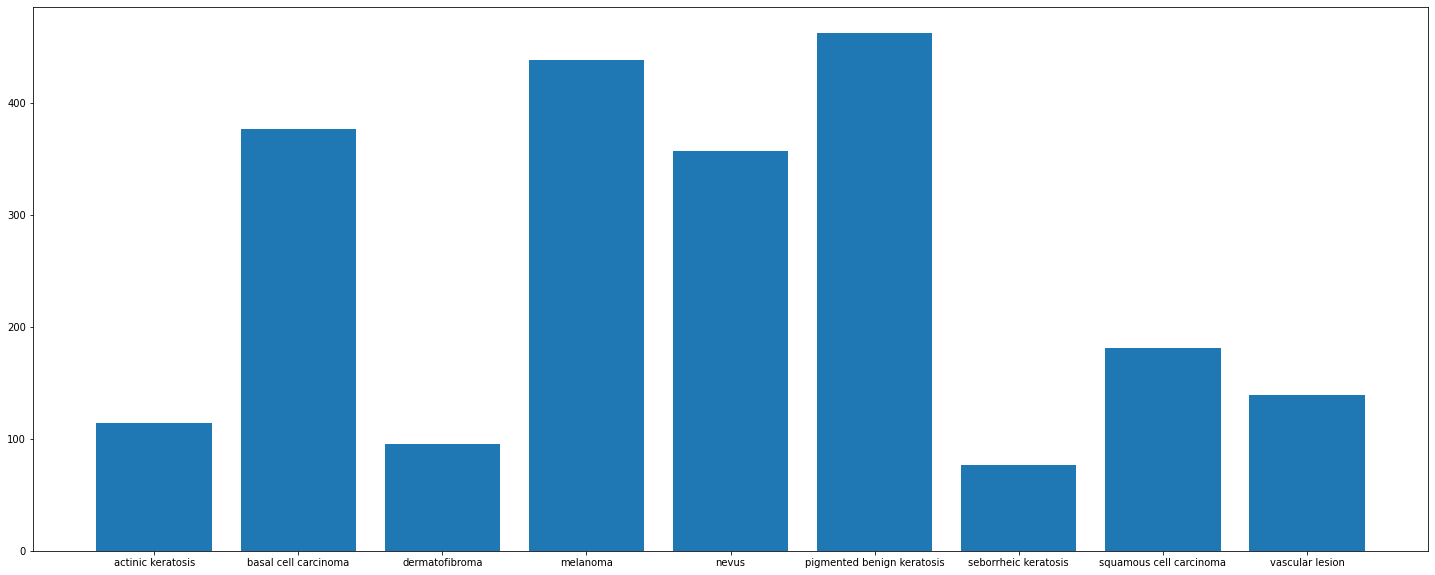

In [25]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

### Here are some questions to be answered 

#### - Which class has the least number of samples?
 **Answer :-** squamous cell carcinoma has least number of samples

#### - Which classes dominate the data in terms proportionate number of samples?
 **Answer :-** actinic keratosis and dermatofibroma have proportionate number of classes.

In [26]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

#### Installing Augmentor using pip command

In [27]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
path_to_training_dataset="To do"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline('/content/drive/MyDrive/Melanoma_Detection/Train')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Melanoma_Detection/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F365A13B910>: 100%|██████████| 500/500 [00:49<00:00, 10.15 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Melanoma_Detection/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F365A707D10>: 100%|██████████| 500/500 [00:48<00:00, 10.30 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Melanoma_Detection/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F365A459610>: 100%|██████████| 500/500 [00:45<00:00, 11.06 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Melanoma_Detection/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F365AE96E50>: 100%|██████████| 500/500 [00:45<00:00, 11.03 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Melanoma_Detection/Train/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7F365A66BC10>: 100%|██████████| 500/500 [00:44<00:00, 11.14 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Melanoma_Detection/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F365AE5ABD0>: 100%|██████████| 500/500 [00:42<00:00, 11.73 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Melanoma_Detection/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F365AEB6A10>: 100%|██████████| 500/500 [00:38<00:00, 12.86 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Melanoma_Detection/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F365C478C90>: 100%|██████████| 500/500 [00:39<00:00, 12.53 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Melanoma_Detection/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F365A6DCB10>: 100%|██████████| 500/500 [00:44<00:00, 11.33 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.

In [29]:
data_dir_train1 = pathlib.Path("/content/drive/MyDrive/Melanoma_Detection/Train/output")
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

4500


In [30]:
for i in class_names:
      
    for j in data_dir_train1.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,/content/drive/MyDrive/Melanoma_Detection/Trai...,actinic keratosis
1,/content/drive/MyDrive/Melanoma_Detection/Trai...,actinic keratosis
2,/content/drive/MyDrive/Melanoma_Detection/Trai...,actinic keratosis
3,/content/drive/MyDrive/Melanoma_Detection/Trai...,actinic keratosis
4,/content/drive/MyDrive/Melanoma_Detection/Trai...,actinic keratosis
...,...,...
6734,/content/drive/MyDrive/Melanoma_Detection/Trai...,vascular lesion
6735,/content/drive/MyDrive/Melanoma_Detection/Trai...,vascular lesion
6736,/content/drive/MyDrive/Melanoma_Detection/Trai...,vascular lesion
6737,/content/drive/MyDrive/Melanoma_Detection/Trai...,vascular lesion


### Distribution of augmented data after adding new images to the original training data.

In [31]:
new_df['Label'].value_counts()

pigmented benign keratosis    1352
melanoma                      1341
basal cell carcinoma          1130
nevus                         1082
squamous cell carcinoma        547
vascular lesion                425
actinic keratosis              344
dermatofibroma                 294
seborrheic keratosis           224
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

In [32]:
new_df['Label'].value_counts()

pigmented benign keratosis    1352
melanoma                      1341
basal cell carcinoma          1130
nevus                         1082
squamous cell carcinoma        547
vascular lesion                425
actinic keratosis              344
dermatofibroma                 294
seborrheic keratosis           224
Name: Label, dtype: int64

we have added 500 images to all the classes to maintain some class balance. We can add more images to improve training process.

#### **Todo**: Training the model using Augmentor

In [33]:
batch_size = 32
img_height = 180
img_width = 180

In [34]:
import pathlib
#data_dir_train1=pathlib.Path("/content/drive/MyDrive/Melanoma_Detection/Train/output")
data_dir_train1=pathlib.Path("/content/drive/MyDrive/Melanoma_Detection/Train")

#### **Todo:** Creating a training dataset

In [35]:
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

2239


In [36]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


data_dir_train1=pathlib.Path("/content/drive/MyDrive/Melanoma_Detection/Train")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 10 classes.
Using 5392 files for training.


### Creating a validation dataset

In [37]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 10 classes.
Using 1347 files for validation.


### Model 3 : CNN Model With Normalization using Augmentor Library

In [38]:

## Using Dropout layer for any evidence of overfitting in the findings
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ 
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

In [39]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### Training the model

In [40]:
## using 50 epochs.
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 36s 203ms/step - loss: nan - accuracy: 0.0191 - val_loss: nan - val_accuracy: 0.0230
Epoch 2/50
169/169 [==============================] - 34s 193ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 3/50
169/169 [==============================] - 34s 193ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 4/50
169/169 [==============================] - 34s 192ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 5/50
169/169 [==============================] - 34s 192ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 6/50
169/169 [==============================] - 34s 192ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 7/50
169/169 [==============================] - 34s 193ms/step - loss: nan - accuracy: 0.0154 - val_loss: nan - val_accuracy: 0.0230
Epoch 8/50
169/169 [==================

####  Visualizing the model results

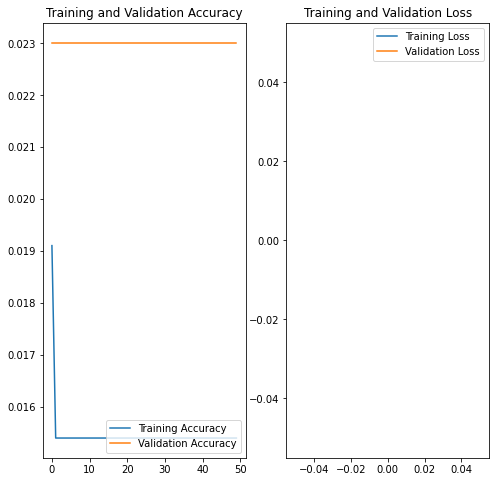

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

####  Analyzing the results here. Did you get rid of underfitting/overfitting?



2. The Model is still overfitting
2. The accuracy on training data has really increased by using Augmentor library
3. It seems that overfitting can be solved by adding more layer,neurons or adding more dropout layers.